In [ ]:
import numpy as np

# Load the .npz file
# # Access individual arrays from the .npz file



data = np.load('PeMSD8_speed.npy')
print("Contents of the file:")
print(data.shape)
# print(data[0,:,:])
print(data[0,119,:])
print(data[0,120,:])
print(data[0,122,:])

# data2 = np.load('pems08.npz')
# print("Contents of the file:")
# # print(data2.files[0].shape)
# # print(data2[0,:,:])
# for key in data2.files:
#     print(data2[key].shape)  # Print the array contents
#     print(print(data2[key][0,0:2,:]))

Contents of the file:
(17856, 170, 3)
[1.47e+02 2.87e-02 6.88e+01]
[1.23e+02 2.55e-02 6.91e+01]
[1.53e+02 2.62e-02 6.93e+01]


In [ ]:
import torch

data_tensor = torch.tensor(data)
if (torch.all(data_tensor >= 0)):
  print("all pos")
num_neg_values = torch.sum(data_tensor < 0).item()
print("Number of negative values:", num_neg_values)

all pos
Number of negative values: 0


In [ ]:
import csv

# Open the CSV file in read mode
with open("PeMSD8_adj.csv", "r") as csvfile:
    reader = csv.reader(csvfile)

    # Iterate over each row
    links = [0] * 171
    i=0
    for row in reader:
        # Convert the row elements from strings to numerical values
        numerical_row = [float(value) for value in row]

        # Count the non-zero elements using sum()
        non_zero_count = sum(1 for value in numerical_row if value != 0)
        links[i] = non_zero_count
        # Print the row index (starting from 0) and the non-zero count
        print(f"Row {reader.line_num - 1}: {non_zero_count} non-zero values")
        i+=1
print(links)
non_two_count = sum(1 for value in links if value == 2)
print (non_two_count)

Row 0: 1 non-zero values
Row 1: 1 non-zero values
Row 2: 2 non-zero values
Row 3: 2 non-zero values
Row 4: 6 non-zero values
Row 5: 4 non-zero values
Row 6: 5 non-zero values
Row 7: 6 non-zero values
Row 8: 6 non-zero values
Row 9: 3 non-zero values
Row 10: 2 non-zero values
Row 11: 2 non-zero values
Row 12: 2 non-zero values
Row 13: 9 non-zero values
Row 14: 9 non-zero values
Row 15: 4 non-zero values
Row 16: 2 non-zero values
Row 17: 5 non-zero values
Row 18: 5 non-zero values
Row 19: 7 non-zero values
Row 20: 4 non-zero values
Row 21: 3 non-zero values
Row 22: 8 non-zero values
Row 23: 2 non-zero values
Row 24: 2 non-zero values
Row 25: 1 non-zero values
Row 26: 4 non-zero values
Row 27: 2 non-zero values
Row 28: 2 non-zero values
Row 29: 6 non-zero values
Row 30: 6 non-zero values
Row 31: 3 non-zero values
Row 32: 3 non-zero values
Row 33: 2 non-zero values
Row 34: 2 non-zero values
Row 35: 2 non-zero values
Row 36: 2 non-zero values
Row 37: 4 non-zero values
Row 38: 3 non-zero val

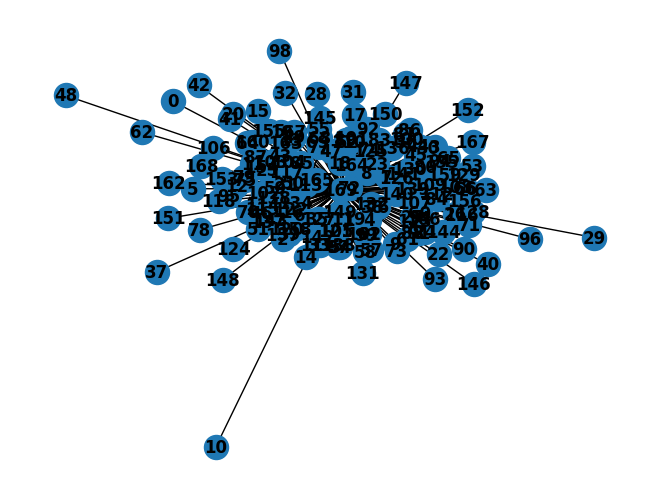

In [ ]:
import csv
import networkx as nx

# Create an empty graph
G = nx.Graph()

# Open the CSV file in read mode
with open("PeMSD8_adj.csv", "r") as csvfile:
    reader = csv.reader(csvfile)

    # # Skip the header row (if present)
    # next(reader)

    # Read the data and build the graph
    for row in reader:
        # Convert elements to floats (assuming mixed data types)
        numerical_row = [float(value) for value in row]

        # Add nodes to the graph
        for i, value in enumerate(numerical_row):
            G.add_node(i)

        # Add edges only for non-zero values (considering both integers and floats)
        for j, value in enumerate(numerical_row):
            if value != 0:  # Check for non-zero values (integers or floats)
                G.add_edge(i, j, weight=value)

# Layout the graph (optional)
pos = nx.spring_layout(G)  # You can use different layout algorithms

# Plot the graph using matplotlib
import matplotlib.pyplot as plt

nx.draw(G, pos, with_labels=True, font_weight='bold')  # Customize visualization as needed
plt.show()


In [ ]:
import numpy as np

file_path = "PeMSD8_adj.csv"

# Load the adjacency matrix from the CSV file
adjacency_matrix = np.genfromtxt(file_path, delimiter=',')

# Sample vector representing the number of links from each node
num_links = links

# Initialize lists to store the new adjacency matrix and edge list
new_adjacency_matrix = []
edges = []

# Iterate over each row of the adjacency matrix
for i, row in enumerate(adjacency_matrix):
    # Check if the number of links for this node is not equal to 2
    if num_links[i] != 2:
        # Add this row to the new adjacency matrix
        new_adjacency_matrix.append(row)

        # Find the indices of nodes connected to this node
        connected_nodes = np.where(row == 1)[0]

        # Iterate over connected nodes
        for node in connected_nodes:
            # Add an edge if the connected node has exactly 2 links
            if num_links[node] == 2:
                edges.append((i, node))

# Convert lists to NumPy arrays
new_adjacency_matrix = np.array(new_adjacency_matrix)
edges = np.array(edges)

# Print the new adjacency matrix and edges
print("New adjacency matrix shape:", new_adjacency_matrix.shape)
print("Edges:", edges)


New adjacency matrix shape: (93, 170)
Edges: []


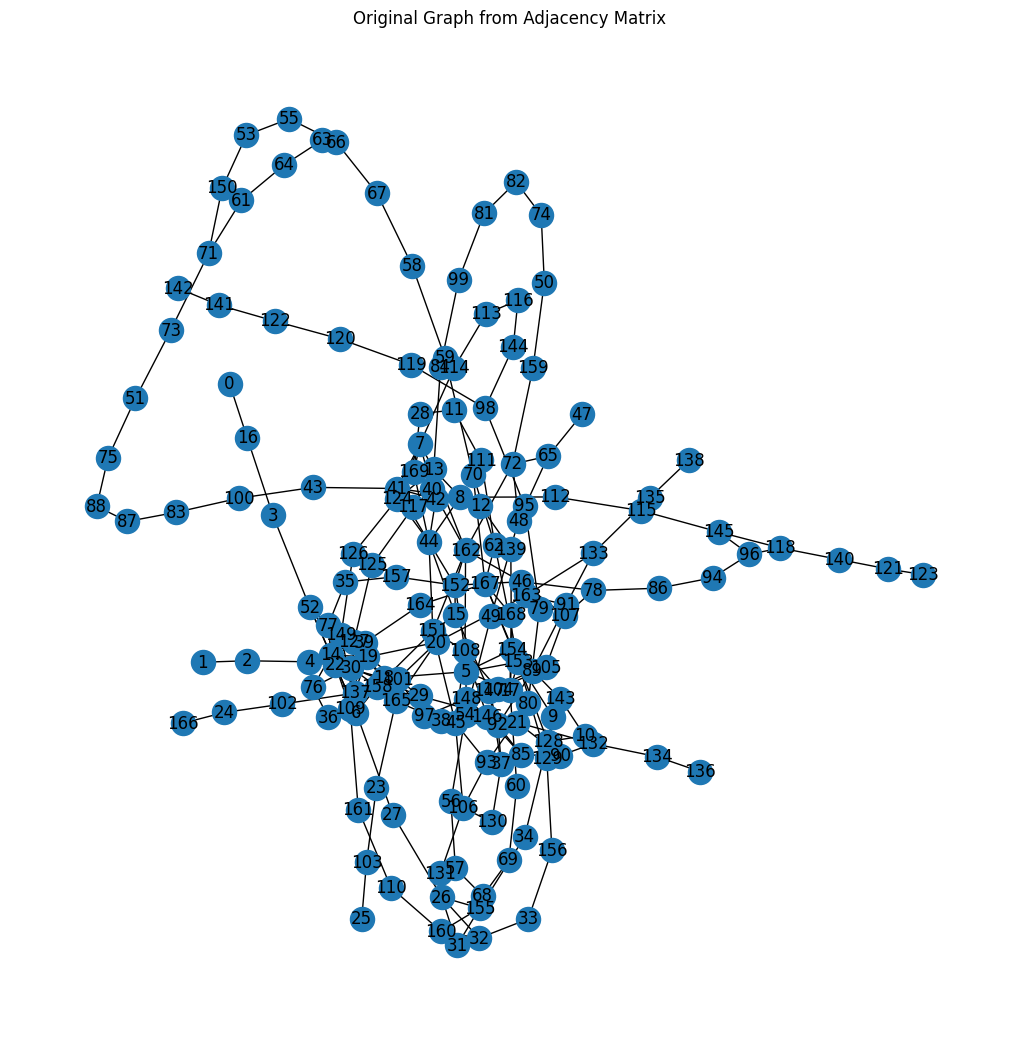

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Load the adjacency matrix
adj_matrix = np.genfromtxt("PeMSD8_adj.csv", delimiter=',')

# Create an empty graph
G = nx.Graph()

# Add edges based on the adjacency matrix
n = adj_matrix.shape[0]
for i in range(n):
    for j in range(n):
        if adj_matrix[i, j] != 0:
            G.add_edge(i, j)

# Draw the graph
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True)
plt.title("Original Graph from Adjacency Matrix")
plt.show()


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:305: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowsize.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


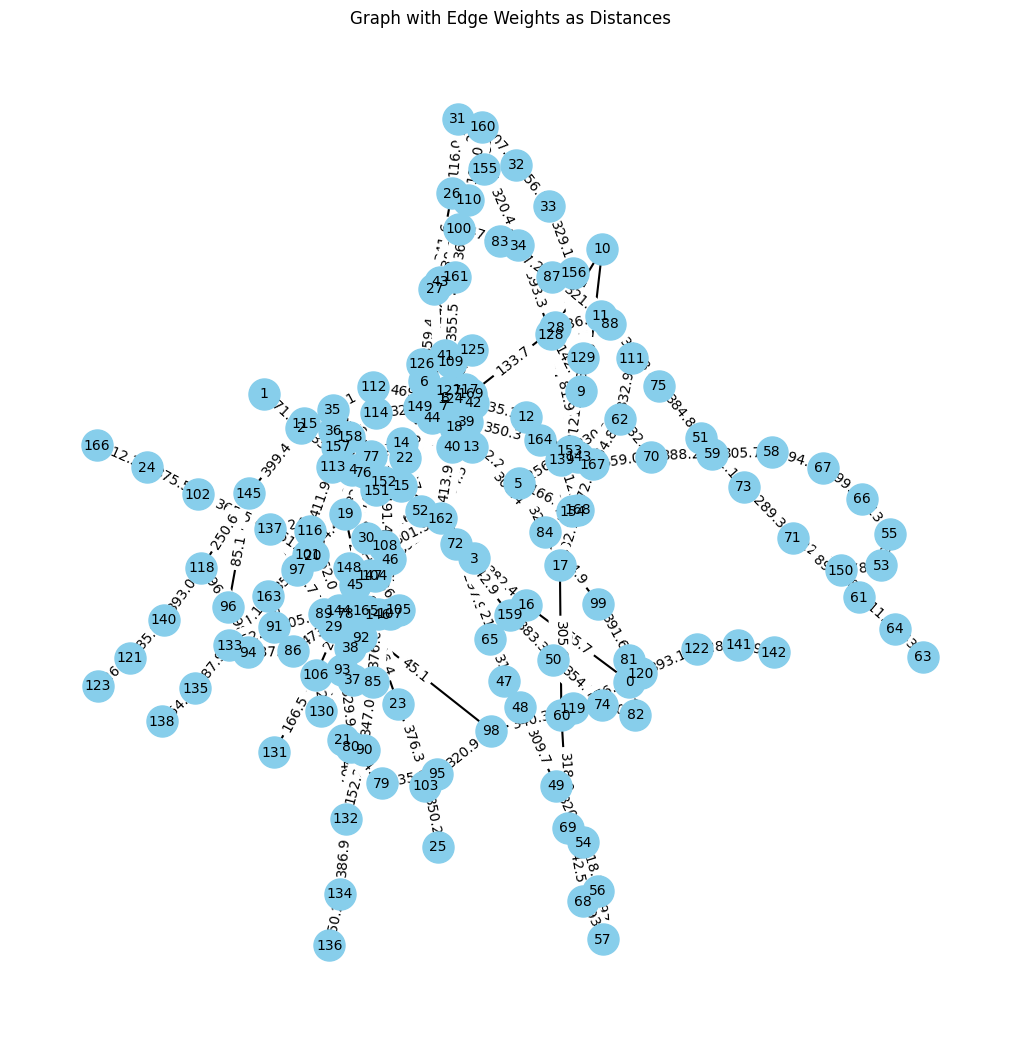

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Load the adjacency matrix
adj_matrix = np.genfromtxt("PeMSD8_adj.csv", delimiter=',')

# Create an empty graph
G = nx.Graph()

# Add edges based on the adjacency matrix and set edge weights
n = adj_matrix.shape[0]
for i in range(n):
    for j in range(n):
        if adj_matrix[i, j] != 0:
            G.add_edge(i, j, weight=adj_matrix[i, j])  # Set edge weight

# Draw the graph with edge weights as distances
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, scale=10)  # Adjust the scale parameter to spread out the nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, font_size=10, edge_color='k', width=1.5,
        edge_cmap=plt.cm.Blues, arrowsize=20, connectionstyle='arc3, rad=0.1')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Graph with Edge Weights as Distances")
plt.show()


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:305: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowsize.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


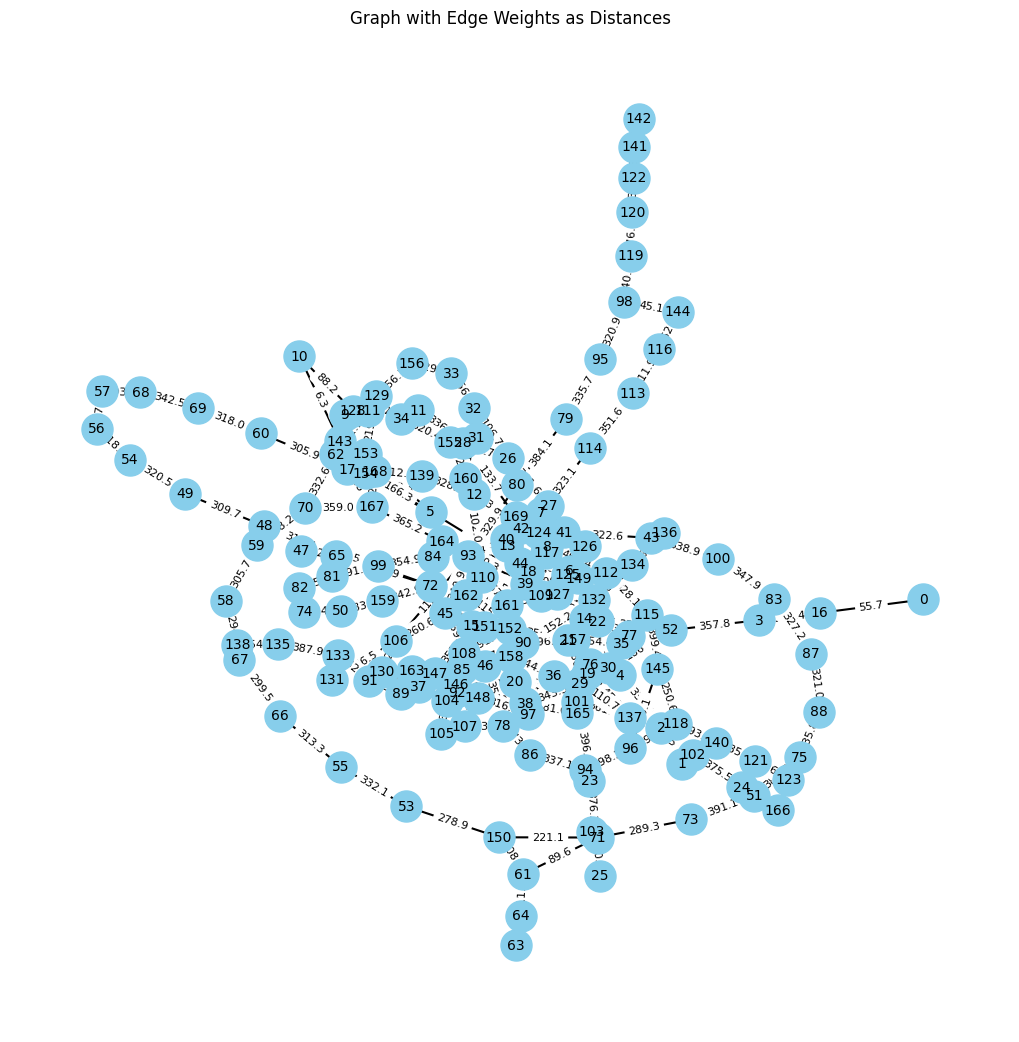

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Load the adjacency matrix
adj_matrix = np.genfromtxt("PeMSD8_adj.csv", delimiter=',')

# Create an empty graph
G = nx.Graph()

# Add edges based on the adjacency matrix and set edge weights
n = adj_matrix.shape[0]
for i in range(n):
    for j in range(n):
        if adj_matrix[i, j] != 0:
            G.add_edge(i, j, weight=adj_matrix[i, j])  # Set edge weight

# Draw the graph with edge weights as distances
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, scale=500)  # Adjust the scale parameter to spread out the nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, font_size=10, edge_color='k', width=1.5,
        edge_cmap=plt.cm.Blues, arrowsize=20, connectionstyle='arc3, rad=0.1')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)  # Increase font size of edge labels
plt.title("Graph with Edge Weights as Distances")
plt.show()


In [ ]:
class DirectedHyperedge:
    def __init__(self):
        self.head = set()
        self.tail = []

def build_directed_hypergraph(distance_matrix, lambda_dist):
    n = distance_matrix.shape[0]
    set_dh = []
    matrix = np.zeros((170,170))
    i = 0
    j = 0

    # Step 1: Create Directed Hyperedges
    while i < n:
        he = DirectedHyperedge()
        he.head.add(i)
        he.tail = []
        while j < n:
            if distance_matrix[j, i] > lambda_dist:
                he.tail.append(j)
            j += 1
        set_dh.append(he)
        i += 1
        j = 0

    # Step 2: Merge Directed Hyperedges
    i = 0
    while i < n:
        if set_dh[i] is not None:
            j = 0
            while j < n:
                if set_dh[j] is not None and set_dh[i] is not None:
                    print(f'i: {i}, j: {j}, tail_i: {set_dh[i].tail}, tail_j: {set_dh[j].tail}')
                    for val in set_dh[i].tail:
                      matrix[i][val] = distance_matrix[i][val]
                    if set_dh[i].tail == set_dh[j].tail:
                        set_dh[i].head = set_dh[i].head.union(set_dh[j].head)
                        set_dh[j] = None
                j += 1
        i += 1

    return matrix

# Example usage:
# Assuming you have a distance matrix `D` and a value for `lambda_dist`
# set_dh = build_directed_hypergraph(D, lambda_dist)


In [ ]:
# Example usage
dist = adj_matrix
dist_lambda = 0

result = build_directed_hypergraph(dist, dist_lambda)
print(result)


i: 0, j: 0, tail_i: [16], tail_j: [16]
i: 1, j: 1, tail_i: [2], tail_j: [2]
i: 2, j: 2, tail_i: [1, 4], tail_j: [1, 4]
i: 3, j: 3, tail_i: [16, 52], tail_j: [16, 52]
i: 4, j: 4, tail_i: [2, 14, 19, 22, 30, 76], tail_j: [2, 14, 19, 22, 30, 76]
i: 5, j: 5, tail_i: [17, 18, 153, 154], tail_j: [17, 18, 153, 154]
i: 6, j: 6, tail_i: [14, 18, 22, 27, 149], tail_j: [14, 18, 22, 27, 149]
i: 7, j: 7, tail_i: [13, 40, 41, 114, 124, 169], tail_j: [13, 40, 41, 114, 124, 169]
i: 8, j: 8, tail_i: [13, 41, 42, 44, 112, 117], tail_j: [13, 41, 42, 44, 112, 117]
i: 9, j: 9, tail_i: [128, 129, 153], tail_j: [128, 129, 153]
i: 10, j: 10, tail_i: [128, 143], tail_j: [128, 143]
i: 11, j: 11, tail_i: [28, 111], tail_j: [28, 111]
i: 12, j: 12, tail_i: [42, 139], tail_j: [42, 139]
i: 13, j: 13, tail_i: [7, 8, 40, 42, 84, 117, 124, 162, 169], tail_j: [7, 8, 40, 42, 84, 117, 124, 162, 169]
i: 14, j: 14, tail_i: [4, 6, 19, 39, 52, 76, 77, 127, 149], tail_j: [4, 6, 19, 39, 52, 76, 77, 127, 149]
i: 15, j: 15, tail_

In [ ]:
result_lines = [
    "i: 0, j: 0, tail_i: [16], tail_j: [16]",
    "i: 1, j: 1, tail_i: [2], tail_j: [2]",
    "i: 2, j: 2, tail_i: [1, 4], tail_j: [1, 4]",
    "i: 3, j: 3, tail_i: [16, 52], tail_j: [16, 52]",
    "i: 4, j: 4, tail_i: [2, 14, 19, 22, 30, 76], tail_j: [2, 14, 19, 22, 30, 76]",
    "i: 5, j: 5, tail_i: [17, 18, 153, 154], tail_j: [17, 18, 153, 154]",
    "i: 6, j: 6, tail_i: [14, 18, 22, 27, 149], tail_j: [14, 18, 22, 27, 149]",
    "i: 7, j: 7, tail_i: [13, 40, 41, 114, 124, 169], tail_j: [13, 40, 41, 114, 124, 169]",
    "i: 8, j: 8, tail_i: [13, 41, 42, 44, 112, 117], tail_j: [13, 41, 42, 44, 112, 117]",
    "i: 9, j: 9, tail_i: [128, 129, 153], tail_j: [128, 129, 153]",
    "i: 10, j: 10, tail_i: [128, 143], tail_j: [128, 143]",
    "i: 11, j: 11, tail_i: [28, 111], tail_j: [28, 111]",
    "i: 12, j: 12, tail_i: [42, 139], tail_j: [42, 139]",
    "i: 13, j: 13, tail_i: [7, 8, 40, 42, 84, 117, 124, 162, 169], tail_j: [7, 8, 40, 42, 84, 117, 124, 162, 169]",
    "i: 14, j: 14, tail_i: [4, 6, 19, 39, 52, 76, 77, 127, 149], tail_j: [4, 6, 19, 39, 52, 76, 77, 127, 149]",
    "i: 15, j: 15, tail_i: [44, 147, 151, 152], tail_j: [44, 147, 151, 152]",
    "i: 16, j: 16, tail_i: [0, 3], tail_j: [0, 3]",
    "i: 17, j: 17, tail_i: [5, 60, 153, 154, 168], tail_j: [5, 60, 153, 154, 168]",
    "i: 18, j: 18, tail_i: [5, 6, 22, 109, 127], tail_j: [5, 6, 22, 109, 127]",
    "i: 19, j: 19, tail_i: [4, 14, 20, 77, 101, 137, 165], tail_j: [4, 14, 20, 77, 101, 137, 165]",
    "i: 20, j: 20, tail_i: [19, 101, 163, 165], tail_j: [19, 101, 163, 165]",
    "i: 21, j: 21, tail_i: [29, 90, 132], tail_j: [29, 90, 132]",
    "i: 22, j: 22, tail_i: [4, 6, 18, 30, 52, 77, 109, 149], tail_j: [4, 6, 18, 30, 52, 77, 109, 149]",
    "i: 23, j: 23, tail_i: [103, 165], tail_j: [103, 165]",
    "i: 24, j: 24, tail_i: [102, 166], tail_j: [102, 166]",
    "i: 25, j: 25, tail_i: [103], tail_j: [103]",
    "i: 26, j: 26, tail_i: [27, 31, 32, 155], tail_j: [27, 31, 32, 155]",
    "i: 27, j: 27, tail_i: [26, 31, 32], tail_j: [26, 31, 32]",
    "i: 28, j: 28, tail_i: [11, 93, 111], tail_j: [11, 93, 111]",
    "i: 29, j: 29, tail_i: [21, 85, 132], tail_j: [21, 85, 132]",
    "i: 30, j: 30, tail_i: [4, 22, 32, 41, 52, 57, 76, 82, 121, 125, 126, 130, 149, 155, 158, 169], tail_j: [4, 22, 32, 41, 52, 57, 76, 82, 121, 125, 126, 130, 149, 155, 158, 169]",
    "i: 31, j: 31, tail_i: [26, 27, 32, 155], tail_j: [26, 27, 32, 155]",
    "i: 32, j: 32, tail_i: [26, 27, 30, 31, 155], tail_j: [26, 27, 30, 31, 155]",
    "i: 33, j: 33, tail_i: [137], tail_j: [137]",
    "i: 34, j: 34, tail_i: [97], tail_j: [97]",
    "i: 35, j: 35, tail_i: [94], tail_j: [94]",
    "i: 36, j: 36, tail_i: [96], tail_j: [96]",
    "i: 37, j: 37, tail_i: [93], tail_j: [93]",
    "i: 38, j: 38, tail_i: [95], tail_j: [95]",
    "i: 39, j: 39, tail_i: [14, 19, 49, 76, 77, 127, 128, 149], tail_j: [14, 19, 49, 76, 77, 127, 128, 149]",
    "i: 40, j: 40, tail_i: [7, 13, 41, 42, 84, 112, 117, 124, 162], tail_j: [7, 13, 41, 42, 84, 112, 117, 124, 162]",
    "i: 41, j: 41, tail_i: [7, 13, 40, 42, 84, 112, 117, 124, 162], tail_j: [7, 13, 40, 42, 84, 112, 117, 124, 162]",
    "i: 42, j: 42, tail_i: [7, 8, 13, 40, 41, 84, 112, 117, 124, 162], tail_j: [7, 8, 13, 40, 41, 84, 112, 117, 124, 162]",
    "i: 43, j: 43, tail_i: [103, 164], tail_j: [103, 164]",
    "i: 44, j: 44, tail_i: [15, 16, 147, 151, 152], tail_j: [15, 16, 147, 151, 152]",
    "i: 45, j: 45, tail_i: [100, 134, 168], tail_j: [100, 134, 168]",
    "i: 46, j: 46, tail_i: [100, 163, 168], tail_j: [100, 163, 168]",
    "i: 47, j: 47, tail_i: [104, 132], tail_j: [104, 132]",
    "i: 48, j: 48, tail_i: [108, 148], tail_j: [108, 148]",
    "i: 49, j: 49, tail_i: [39, 76, 127, 128], tail_j: [39, 76, 127, 128]",
    "i: 50, j: 50, tail_i: [109], tail_j: [109]",
    "i: 51, j: 51, tail_i: [110], tail_j: [110]",
    "i: 52, j: 52, tail_i: [4, 6, 14, 18, 22, 30, 39, 76, 77, 109, 127, 149], tail_j: [4, 6, 14, 18, 22, 30, 39, 76, 77, 109, 127, 149]",
    "i: 53, j: 53, tail_i: [110, 149], tail_j: [110, 149]",
    "i: 54, j: 54, tail_i: [111, 149], tail_j: [111, 149]",
    "i: 55, j: 55, tail_i: [112, 149], tail_j: [112, 149]",
    "i: 56, j: 56, tail_i: [113, 149], tail_j: [113, 149]",
    "i: 57, j: 57, tail_i: [30, 76, 149], tail_j: [30, 76, 149]",
    "i: 58, j: 58, tail_i: [107], tail_j: [107]",
    "i: 59, j: 59, tail_i: [101, 103, 105, 106, 132], tail_j: [101, 103, 105, 106, 132]",
    "i: 60, j: 60, tail_i: [17, 153, 154, 168], tail_j: [17, 153, 154, 168]",
    "i: 61, j: 61, tail_i: [103], tail_j: [103]",
    "i: 62, j: 62, tail_i: [105], tail_j: [105]",
    "i: 63, j: 63, tail_i: [108], tail_j: [108]",
    "i: 64, j: 64, tail_i: [109], tail_j: [109]",
    "i: 65, j: 65, tail_i: [112], tail_j: [112]",
    "i: 66, j: 66, tail_i: [111], tail_j: [111]",
    "i: 67, j: 67, tail_i: [113], tail_j: [113]",
    "i: 68, j: 68, tail_i: [110], tail_j: [110]",
    "i: 69, j: 69, tail_i: [114, 115], tail_j: [114, 115]",
    "i: 70, j: 70, tail_i: [114], tail_j: [114]",
    "i: 71, j: 71, tail_i: [115], tail_j: [115]",
    "i: 72, j: 72, tail_i: [116], tail_j: [116]",
    "i: 73, j: 73, tail_i: [116, 164], tail_j: [116, 164]",
    "i: 74, j: 74, tail_i: [164], tail_j: [164]",
    "i: 75, j: 75, tail_i: [164], tail_j: [164]",
    "i: 76, j: 76, tail_i: [30, 39, 57, 149], tail_j: [30, 39, 57, 149]",
    "i: 77, j: 77, tail_i: [39, 52, 149], tail_j: [39, 52, 149]",
    "i: 78, j: 78, tail_i: [117, 148], tail_j: [117, 148]",
    "i: 79, j: 79, tail_i: [164], tail_j: [164]",
    "i: 80, j: 80, tail_i: [118, 148], tail_j: [118, 148]",
    "i: 81, j: 81, tail_i: [121], tail_j: [121]",
    "i: 82, j: 82, tail_i: [4, 30], tail_j: [4, 30]",
    "i: 83, j: 83, tail_i: [122, 148], tail_j: [122, 148]",
    "i: 84, j: 84, tail_i: [7, 13, 40, 41, 42, 112, 124, 162], tail_j: [7, 13, 40, 41, 42, 112, 124, 162]",
    "i: 85, j: 85, tail_i: [14, 29, 86, 128], tail_j: [14, 29, 86, 128]",
    "i: 86, j: 86, tail_i: [14, 85, 128], tail_j: [14, 85, 128]",
    "i: 87, j: 87, tail_i: [123, 134, 149], tail_j: [123, 134, 149]",
    "i: 88, j: 88, tail_i: [126], tail_j: [126]",
    "i: 89, j: 89, tail_i: [127], tail_j: [127]",
    "i: 90, j: 90, tail_i: [128], tail_j: [128]",
    "i: 91, j: 91, tail_i: [129], tail_j: [129]",
    "i: 92, j: 92, tail_i: [131], tail_j: [131]",
    "i: 93, j: 93, tail_i: [37, 47], tail_j: [37, 47]",
    "i: 94, j: 94, tail_i: [35, 141], tail_j: [35, 141]",
    "i: 95, j: 95, tail_i: [38, 77, 119, 133], tail_j: [38, 77, 119, 133]",
    "i: 96, j: 96, tail_i: [36, 125], tail_j: [36, 125]",
    "i: 97, j: 97, tail_i: [34, 161], tail_j: [34, 161]",
    "i: 98, j: 98, tail_i: [120], tail_j: [120]",
    "i: 99, j: 99, tail_i: [119], tail_j: [119]",
    "i: 100, j: 100, tail_i: [45, 46], tail_j: [45, 46]",
    "i: 101, j: 101, tail_i: [59], tail_j: [59]",
    "i: 102, j: 102, tail_i: [130], tail_j: [130]",
    "i: 103, j: 103, tail_i: [43, 61], tail_j: [43, 61]",
    "i: 104, j: 104, tail_i: [47, 67], tail_j: [47, 67]",
    "i: 105, j: 105, tail_i: [62], tail_j: [62]",
    "i: 106, j: 106, tail_i: [59], tail_j: [59]",
    "i: 107, j: 107, tail_i: [58], tail_j: [58]",
    "i: 108, j: 108, tail_i: [48, 63], tail_j: [48, 63]",
    "i: 109, j: 109, tail_i: [50, 64], tail_j: [50, 64]",
    "i: 110, j: 110, tail_i: [51, 68], tail_j: [51, 68]",
    "i: 111, j: 111, tail_i: [54, 66], tail_j: [54, 66]",
    "i: 112, j: 112, tail_i: [56, 65], tail_j: [56, 65]",
    "i: 113, j: 113, tail_i: [67], tail_j: [67]",
    "i: 114, j: 114, tail_i: [69, 70], tail_j: [69, 70]",
    "i: 115, j: 115, tail_i: [69, 71], tail_j: [69, 71]",
    "i: 116, j: 116, tail_i: [72, 73], tail_j: [72, 73]",
    "i: 117, j: 117, tail_i: [40, 78], tail_j: [40, 78]",
    "i: 118, j: 118, tail_i: [80, 83], tail_j: [80, 83]",
    "i: 119, j: 119, tail_i: [95, 99], tail_j: [95, 99]",
    "i: 120, j: 120, tail_i: [98], tail_j: [98]",
    "i: 121, j: 121, tail_i: [81], tail_j: [81]",
    "i: 122, j: 122, tail_i: [83], tail_j: [83]",
    "i: 123, j: 123, tail_i: [87], tail_j: [87]",
    "i: 124, j: 124, tail_i: [13, 40, 84], tail_j: [13, 40, 84]",
    "i: 125, j: 125, tail_i: [30, 36], tail_j: [30, 36]",
    "i: 126, j: 126, tail_i: [30, 88], tail_j: [30, 88]",
    "i: 127, j: 127, tail_i: [19, 39, 49, 89], tail_j: [19, 39, 49, 89]",
    "i: 128, j: 128, tail_i: [9, 19, 49, 69, 90], tail_j: [9, 19, 49, 69, 90]",
    "i: 129, j: 129, tail_i: [9, 91], tail_j: [9, 91]",
    "i: 130, j: 130, tail_i: [92], tail_j: [92]",
    "i: 131, j: 131, tail_i: [92], tail_j: [92]",
    "i: 132, j: 132, tail_i: [21, 59, 87], tail_j: [21, 59, 87]",
    "i: 133, j: 133, tail_i: [95], tail_j: [95]",
    "i: 134, j: 134, tail_i: [45, 87], tail_j: [45, 87]",
    "i: 135, j: 135, tail_i: [136], tail_j: [136]",
    "i: 136, j: 136, tail_i: [135], tail_j: [135]",
    "i: 137, j: 137, tail_i: [19, 33], tail_j: [19, 33]",
    "i: 138, j: 138, tail_i: [149], tail_j: [149]",
    "i: 139, j: 139, tail_i: [12, 22], tail_j: [12, 22]",
    "i: 140, j: 140, tail_i: [141], tail_j: [141]",
    "i: 141, j: 141, tail_i: [94, 140], tail_j: [94, 140]",
    "i: 142, j: 142, tail_i: [143], tail_j: [143]",
    "i: 143, j: 143, tail_i: [10, 142], tail_j: [10, 142]",
    "i: 144, j: 144, tail_i: [145], tail_j: [145]",
    "i: 145, j: 145, tail_i: [144], tail_j: [144]",
    "i: 146, j: 146, tail_i: [147], tail_j: [147]",
    "i: 147, j: 147, tail_i: [15, 44, 146], tail_j: [15, 44, 146]",
    "i: 148, j: 148, tail_i: [48, 78, 83, 87, 108, 118, 122], tail_j: [48, 78, 83, 87, 108, 118, 122]",
    "i: 149, j: 149, tail_i: [14, 22, 39, 52, 57, 77, 86, 113, 138], tail_j: [14, 22, 39, 52, 57, 77, 86, 113, 138]",
    "i: 150, j: 150, tail_i: [151], tail_j: [151]",
    "i: 151, j: 151, tail_i: [15, 44, 150], tail_j: [15, 44, 150]",
    "i: 152, j: 152, tail_i: [15, 44], tail_j: [15, 44]",
    "i: 153, j: 153, tail_i: [5, 9, 10, 17, 59], tail_j: [5, 9, 10, 17, 59]",
    "i: 154, j: 154, tail_i: [5, 9, 17, 60], tail_j: [5, 9, 17, 60]",
    "i: 155, j: 155, tail_i: [26, 27, 30, 31, 32], tail_j: [26, 27, 30, 31, 32]",
    "i: 156, j: 156, tail_i: [157], tail_j: [157]",
    "i: 157, j: 157, tail_i: [156], tail_j: [156]",
    "i: 158, j: 158, tail_i: [30], tail_j: [30]",
    "i: 159, j: 159, tail_i: [160], tail_j: [160]",
    "i: 160, j: 160, tail_i: [159], tail_j: [159]",
    "i: 161, j: 161, tail_i: [34, 97], tail_j: [34, 97]",
    "i: 162, j: 162, tail_i: [7, 13, 40, 41, 42, 84], tail_j: [7, 13, 40, 41, 42, 84]",
    "i: 163, j: 163, tail_i: [20, 46], tail_j: [20, 46]",
    "i: 164, j: 164, tail_i: [43, 73, 74, 75, 79], tail_j: [43, 73, 74, 75, 79]",
    "i: 165, j: 165, tail_i: [19, 23, 20], tail_j: [19, 23, 20]",
    "i: 166, j: 166, tail_i: [24], tail_j: [24]",
    "i: 167, j: 167, tail_i: [25], tail_j: [25]",
    "i: 168, j: 168, tail_i: [45, 60, 71, 96], tail_j: [45, 60, 71, 96]",
    "i: 169, j: 169, tail_i: [30, 32], tail_j: [30, 32]"
  ]



In [ ]:
import networkx as nx

def create_directed_graph(results):
    G = nx.DiGraph()
    for line in results:
        parts = line.split(',')
        i = int(parts[0].split(':')[1].strip())
        tail_i = [int(x.strip()) for x in parts[2][10:-1].split(',')]  # Adjusted indexing
        for j in tail_i:
            G.add_edge(i, j)
    return G

graph = create_directed_graph(result_lines)

# Plot the directed graph
nx.draw(graph, with_labels=True)


ValueError: invalid literal for int() with base 10: ''

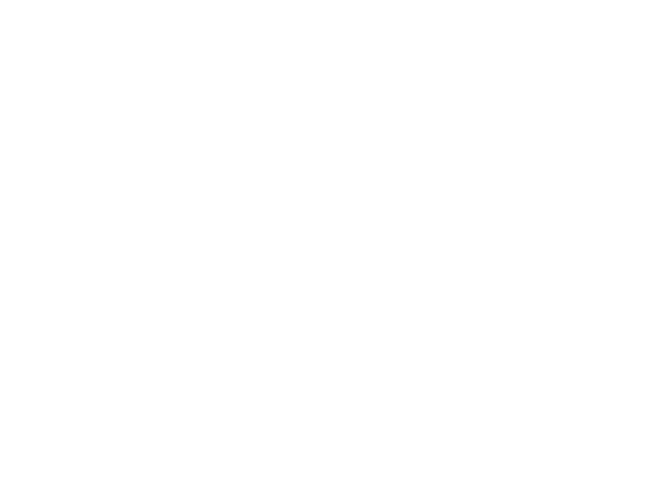

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def build_directed_graph(set_dh):
    G = nx.DiGraph()
    for i, he in enumerate(set_dh):
        if he is not None:
            for tail_node in he.tail:
                for head_node in he.head:
                    G.add_edge(head_node, tail_node)
    return G

# Example usage:
# Assuming you have set_dh after calling build_directed_hypergraph
graph = build_directed_graph(result)

# Plot the directed graph
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_size=1000)
plt.show()

# graph = build_directed_graph(result)
# # Draw the graph
# plt.figure(figsize=(10, 10))
# nx.draw(graph, with_labels=True)
# plt.title("Original Graph from Adjacency Matrix")
# plt.show()

In [ ]:
adj_matrix = np.genfromtxt("PeMSD8_adj.csv", delimiter=',')
if (np.array_equal(adj_matrix, adj_matrix.T)):
  print ("symetric")

symetric


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
data = pd.read_csv("pemsd4.csv")

# Display the first few rows of the DataFrame
print(data.shape)
print(data[1:60])

(340, 3)
    from   to    cost
1      5  154   347.2
2    154  263   392.9
3    263   56   440.8
4     56   96   374.6
5     96   42   378.1
6     42   58   364.6
7     58   95   476.8
8     95   72   480.1
9     72  271   419.5
10   271   68   251.1
11   134  107   344.0
12   107  130   862.1
13   130  129   482.5
14   227  167  1425.7
15   167  298   415.7
16   298  209   425.5
17   209  146   519.6
18   146  170   494.7
19   170  173   400.7
20   173  117   372.4
21   117    0   573.5
22     0   92   398.0
23    92  243   667.3
24   243   62   357.3
25   203   80  1071.1
26    80   97   834.1
27    97   28   531.4
28    28   57   327.7
29    57   55   925.2
30    55  223   382.7
31   223  143   309.5
32   143  269   329.1
33   269  290   362.0
34   290  110   425.6
35   110  121   388.4
36   121  299   327.1
37   299  293   326.1
38   293  148   534.9
39   148  150   341.1
40   150  152   354.5
41    98   70   315.1
42    70  255  1308.8
43   128  131   672.4
44   131  132   803.8
4

In [ ]:
import numpy as np

# Load the NPZ file
data = np.load("pemsd4.npz")

# Display the keys in the NPZ file
print("Keys in the NPZ file:", data.keys())

# Access and display the contents of each key
for key in data.keys():
    print("Data in key '{}':".format(key))
    print(data[key])


Keys in the NPZ file: KeysView(NpzFile 'pemsd4.npz' with keys: data)
Data in key 'data':
[[[6.20e+01 7.70e-03 6.79e+01]
  [5.60e+01 1.12e-02 6.84e+01]
  [9.00e+01 1.43e-02 6.82e+01]
  ...
  [5.60e+01 9.80e-03 6.74e+01]
  [4.80e+01 7.80e-03 6.95e+01]
  [3.80e+01 9.40e-03 6.82e+01]]

 [[6.10e+01 7.40e-03 6.73e+01]
  [4.00e+01 8.00e-03 6.86e+01]
  [9.40e+01 1.56e-02 6.78e+01]
  ...
  [5.10e+01 9.40e-03 6.60e+01]
  [3.00e+01 5.00e-03 6.91e+01]
  [3.50e+01 8.50e-03 6.88e+01]]

 [[7.10e+01 9.30e-03 6.84e+01]
  [2.80e+01 6.80e-03 6.74e+01]
  [7.90e+01 1.22e-02 6.87e+01]
  ...
  [6.70e+01 1.17e-02 6.67e+01]
  [3.10e+01 5.30e-03 6.88e+01]
  [4.50e+01 1.11e-02 6.95e+01]]

 ...

 [[6.60e+01 8.90e-03 6.78e+01]
  [7.60e+01 1.58e-02 6.59e+01]
  [7.70e+01 1.82e-02 6.40e+01]
  ...
  [8.50e+01 1.45e-02 6.73e+01]
  [5.80e+01 1.00e-02 6.93e+01]
  [5.70e+01 1.66e-02 6.78e+01]]

 [[7.70e+01 1.03e-02 6.74e+01]
  [7.30e+01 1.66e-02 6.58e+01]
  [9.60e+01 2.01e-02 6.31e+01]
  ...
  [6.90e+01 1.20e-02 6.72e+01]

In [ ]:
import h5py

# Open the HDF5 file in read mode
with h5py.File("metr-la.h5", "r") as f:
    # List all the groups in the HDF5 file
    print("Groups in HDF5 file:")
    print(list(f.keys()))

    # Access a specific group
    group_name = "df"  # Replace "df" with the actual group name
    group = f[group_name]


    # List all the datasets in the group
    print("\nDatasets in group:")
    for dataset_name in group.keys():
        dataset = group[dataset_name]
        print(f"\nDataset Name: {dataset_name}")
        print(f"Shape: {dataset.shape}")
        print("Data:")
        print(dataset[:])  # Replace [:] with appropriate slicing if needed


Groups in HDF5 file:
['df']

Datasets in group:

Dataset Name: axis0
Shape: (207,)
Data:
[b'773869' b'767541' b'767542' b'717447' b'717446' b'717445' b'773062'
 b'767620' b'737529' b'717816' b'765604' b'767471' b'716339' b'773906'
 b'765273' b'716331' b'771667' b'716337' b'769953' b'769402' b'769403'
 b'769819' b'769405' b'716941' b'717578' b'716960' b'717804' b'767572'
 b'767573' b'773012' b'773013' b'764424' b'769388' b'716328' b'717819'
 b'769941' b'760987' b'718204' b'718045' b'769418' b'768066' b'772140'
 b'773927' b'760024' b'774012' b'774011' b'767609' b'769359' b'760650'
 b'716956' b'769831' b'761604' b'717495' b'716554' b'773953' b'767470'
 b'716955' b'764949' b'773954' b'767366' b'769444' b'773939' b'774067'
 b'769443' b'767750' b'767751' b'767610' b'773880' b'764766' b'717497'
 b'717490' b'717491' b'717492' b'717493' b'765176' b'717498' b'717499'
 b'765171' b'718064' b'718066' b'765164' b'769431' b'769430' b'717610'
 b'767053' b'767621' b'772596' b'772597' b'767350' b'767351

In [ ]:
import csv
import torch
import numpy as np
import pandas as pd

# Load the CSV file into a DataFrame
data = pd.read_csv("train.csv")

# Display the first five rows of the DataFrame
data.head()




,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435.0


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['vendor_id'].plot(kind='hist', bins=20, title='vendor_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['pickup_longitude'].plot(kind='hist', bins=20, title='pickup_longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['pickup_latitude'].plot(kind='hist', bins=20, title='pickup_latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('pickup_datetime').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('dropoff_datetime').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='index', y='vendor_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='vendor_id', y='pickup_longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='pickup_latitude', y='dropoff_longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['vendor_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('id')):
  _plot_series(series, series_name, i)
  fig.legend(title='id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('vendor_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['vendor_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('pickup_datetime')):
  _plot_series(series, series_name, i)
  fig.legend(title='pickup_datetime', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('vendor_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['vendor_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('dropoff_datetime')):
  _plot_series(series, series_name, i)
  fig.legend(title='dropoff_datetime', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('vendor_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['pickup_longitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('id')):
  _plot_series(series, series_name, i)
  fig.legend(title='id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('pickup_longitude')

from matplotlib import pyplot as plt
_df_15['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['vendor_id'].plot(kind='line', figsize=(8, 4), title='vendor_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['pickup_longitude'].plot(kind='line', figsize=(8, 4), title='pickup_longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['pickup_latitude'].plot(kind='line', figsize=(8, 4), title='pickup_latitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['pickup_datetime'].value_counts()
    for x_label, grp in _df_19.groupby('id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('id')
_ = plt.ylabel('pickup_datetime')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['dropoff_datetime'].value_counts()
    for x_label, grp in _df_20.groupby('pickup_datetime')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('pickup_datetime')
_ = plt.ylabel('dropoff_datetime')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='index', y='id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['pickup_datetime'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='index', y='pickup_datetime', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['dropoff_datetime'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='index', y='dropoff_datetime', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='vendor_id', y='id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
data.head()
print(data.shape)

(1037000, 11)


In [ ]:
import pyarrow.parquet as pq

# Load the Parquet file into a pyarrow table
table = pq.read_table("yellow_tripdata_2023-02.parquet")

# Convert the table to a pandas DataFrame
df = table.to_pandas()

# Print the first five rows of the DataFrame
print(df.head())

# Calculate and display the maximum and minimum values for each column
print(df.max(axis=0))
print(df.min(axis=0))


In [ ]:
print(data.min(axis=0))
print(data.max(axis=0))

<ipython-input-4-adf54f2fe1ef>:1: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.min(axis=0))


id                             id0000001
vendor_id                              1
pickup_datetime      2016-01-01 00:00:17
dropoff_datetime     2016-01-01 00:03:31
passenger_count                        0
pickup_longitude              -78.547401
pickup_latitude                34.359695
dropoff_longitude             -79.817978
dropoff_latitude               32.181141
trip_duration                        1.0
dtype: object
id                             id4000000
vendor_id                              2
pickup_datetime      2016-06-30 23:59:39
dropoff_datetime     2016-07-01 23:02:03
passenger_count                        9
pickup_longitude              -61.335529
pickup_latitude                51.881084
dropoff_longitude             -61.335529
dropoff_latitude               43.911762
trip_duration                  3526282.0
dtype: object


<ipython-input-4-adf54f2fe1ef>:2: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.max(axis=0))


In [ ]:
# prompt: for colmuns pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, show only 4 digits

data['pickup_longitude'] = data['pickup_longitude'].round(2)
data['pickup_latitude'] = data['pickup_latitude'].round(2)
data['dropoff_longitude'] = data['dropoff_longitude'].round(2)
data['dropoff_latitude'] = data['dropoff_latitude'].round(2)

print(data.head())


          id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1            -73.98            40.77             -73.96   
1                1            -73.98            40.74             -74.00   
2                1            -73.98            40.76             -74.01   
3                1            -74.01            40.72             -74.01   
4                1            -73.97            40.79             -73.97   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0             40.77                  N          455.0  
1             40

In [ ]:


import networkx as nx
import pandas as pd

# Load the CSV file into a DataFrame
data = pd.read_csv("train.csv")

# Round the coordinates to two decimal places
data['pickup_longitude'] = data['pickup_longitude'].round(2)
data['pickup_latitude'] = data['pickup_latitude'].round(2)
data['dropoff_longitude'] = data['dropoff_longitude'].round(2)
data['dropoff_latitude'] = data['dropoff_latitude'].round(2)





DiGraph with 2078 nodes and 35505 edges


In [ ]:
# Create a directed graph
G = nx.DiGraph()
selfloops = 0
# Add edges to the graph
for row in data.itertuples():
    source = (row.pickup_longitude, row.pickup_latitude)
    destination = (row.dropoff_longitude, row.dropoff_latitude)
    weight = row.trip_duration
    if (source != destination):
      G.add_edge(source, destination, weight=weight)
    else :
      selfloops+=1
# Print the graph
print(G)
print(selfloops)

DiGraph with 1883 nodes and 34629 edges
72307


<ipython-input-16-710ef4f388e3>:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  subgraph = G.subgraph(random.sample(G.nodes(), 100))


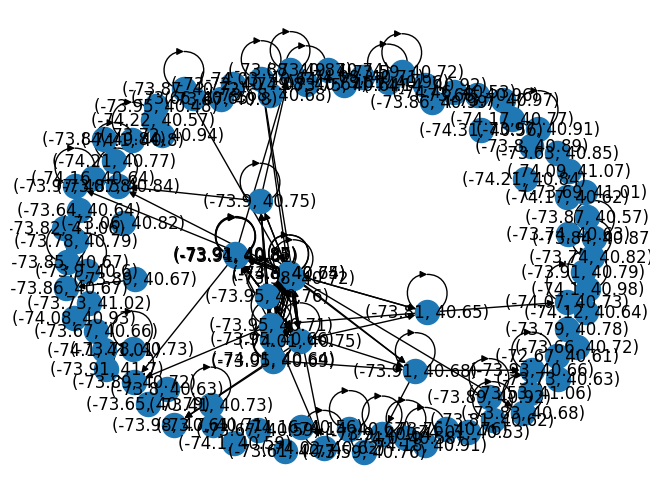

In [ ]:
import random
import matplotlib.pyplot as plt
# Extract a subgraph with a small number of nodes
subgraph = G.subgraph(random.sample(G.nodes(), 100))

# Plot the subgraph
nx.draw(subgraph, with_labels=True)
plt.show()


In [ ]:
min_weight = min(nx.get_edge_attributes(G, 'weight').values())
max_weight = max(nx.get_edge_attributes(G, 'weight').values())

print(f"Minimum weight: {min_weight}")
print(f"Maximum weight: {max_weight}")

Minimum weight: 3
Maximum weight: 86327


In [ ]:
# Load the CSV file into a DataFrame
data3 = pd.read_csv("train.csv")

# Round the coordinates to two decimal places
data3['pickup_longitude'] = data3['pickup_longitude'].round(3)
data3['pickup_latitude'] = data3['pickup_latitude'].round(3)
data3['dropoff_longitude'] = data3['dropoff_longitude'].round(3)
data3['dropoff_latitude'] = data3['dropoff_latitude'].round(3)



DiGraph with 32658 nodes and 1075078 edges


In [ ]:
G3 = nx.DiGraph()

selfloops = 0
# Add edges to the graph
for row in data3.itertuples():
    source = (row.pickup_longitude, row.pickup_latitude)
    destination = (row.dropoff_longitude, row.dropoff_latitude)
    weight = row.trip_duration
    if (source != destination):
      G3.add_edge(source, destination, weight=weight)
    else :
      selfloops+=1

# Print the graph
print(G3)
print(selfloops)

DiGraph with 32045 nodes and 1070697 edges
10764


<ipython-input-25-0514f177c31e>:1: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  subgraph = G3.subgraph(random.sample(G3.nodes(), 300))


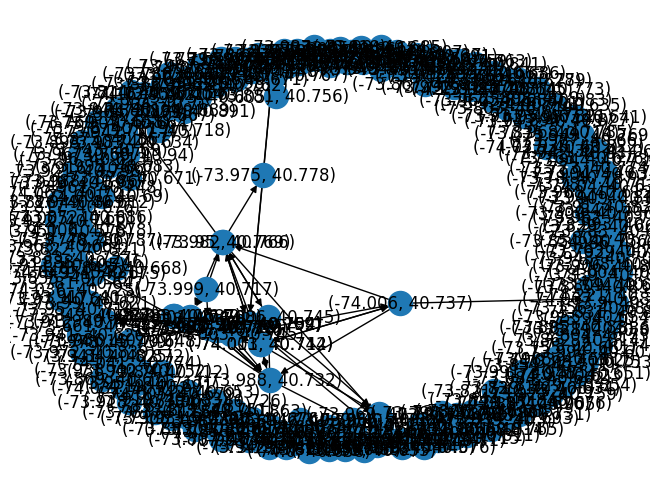

In [ ]:
subgraph = G3.subgraph(random.sample(G3.nodes(), 300))

# Plot the subgraph
nx.draw(subgraph, with_labels=True)
plt.show()


DiGraph with 32045 nodes and 1070697 edges
10764


<ipython-input-30-84edbb825a8b>:36: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  subgraph = G2.subgraph(random.sample(G2.nodes(), 300))


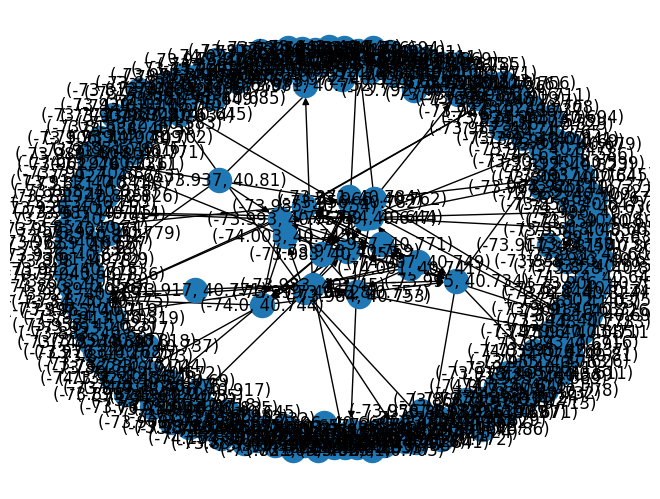

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV file into a DataFrame
data2 = pd.read_csv("train.csv")

# Round the coordinates to two decimal places
data2['pickup_longitude'] = data2['pickup_longitude'].round(3)
data2['pickup_latitude'] = data2['pickup_latitude'].round(3)
data2['dropoff_longitude'] = data2['dropoff_longitude'].round(3)
data2['dropoff_latitude'] = data2['dropoff_latitude'].round(3)


In [ ]:

# Convert the pickup and dropoff timestamps to datetime objects
data2['pickup_datetime'] = pd.to_datetime(data2['pickup_datetime'])
data2['dropoff_datetime'] = pd.to_datetime(data2['dropoff_datetime'])

# Calculate the time difference between pickup and dropoff
data2['time_diff'] = (data2['dropoff_datetime'] - data2['pickup_datetime']).astype('timedelta64[s]')

G2 = nx.DiGraph()

selfloops = 0
# Add edges to the graph
for row in data2.itertuples():
    source = (row.pickup_longitude, row.pickup_latitude)
    destination = (row.dropoff_longitude, row.dropoff_latitude)
    weight = row.trip_duration / row.time_diff
    if (source != destination):
      G2.add_edge(source, destination, weight=weight)
    else :
      selfloops+=1




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV file into a DataFrame
data_no_time = pd.read_csv("train.csv")

# Round the coordinates to two decimal places
data_no_time['pickup_longitude'] = data_no_time['pickup_longitude'].round(3)
data_no_time['pickup_latitude'] = data_no_time['pickup_latitude'].round(3)
data_no_time['dropoff_longitude'] = data_no_time['dropoff_longitude'].round(3)
data_no_time['dropoff_latitude'] = data_no_time['dropoff_latitude'].round(3)

# Convert the pickup and dropoff timestamps to datetime objects
data_no_time['pickup_datetime'] = pd.to_datetime(data_no_time['pickup_datetime'])
data_no_time['dropoff_datetime'] = pd.to_datetime(data_no_time['dropoff_datetime'])

data_no_time = data_no_time[(data_no_time['pickup_datetime'] >= '2016-01-04 08:00:00') & (data_no_time['pickup_datetime'] <= '2016-01-04 09:00:00')]


FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [3]:
print(data_no_time.head)

<bound method NDFrame.head of                 id  vendor_id     pickup_datetime    dropoff_datetime  \
1695     id1261506          2 2016-01-04 08:45:43 2016-01-04 08:57:27   
3560     id3277602          1 2016-01-04 08:02:30 2016-01-04 08:11:54   
14435    id2988116          2 2016-01-04 08:44:18 2016-01-04 09:02:44   
14852    id3771820          2 2016-01-04 08:46:00 2016-01-04 08:55:04   
20689    id0344937          2 2016-01-04 08:44:24 2016-01-04 09:06:09   
...            ...        ...                 ...                 ...   
1439190  id1897825          1 2016-01-04 08:01:53 2016-01-04 08:10:27   
1440583  id0774693          1 2016-01-04 08:53:49 2016-01-04 09:06:26   
1443719  id2318915          1 2016-01-04 08:44:11 2016-01-04 08:56:04   
1447281  id3287491          2 2016-01-04 08:53:20 2016-01-04 09:07:12   
1457482  id2475552          2 2016-01-04 08:02:37 2016-01-04 08:06:44   

         passenger_count  pickup_longitude  pickup_latitude  \
1695                   2      

In [2]:
import networkx as nx
G = nx.DiGraph()

selfloops = 0
# Add edges to the graph
for row in data_no_time.itertuples():
    source = (row.pickup_longitude, row.pickup_latitude)
    destination = (row.dropoff_longitude, row.dropoff_latitude)
    weight = row.trip_duration
    if (source != destination):
      G.add_edge(source, destination, weight=weight)
    else :
      selfloops+=1

AttributeError: 'Pandas' object has no attribute 'time_diff'

In [ ]:

# Initialize empty lists for the new features
traffic_from = []
traffic_into = []
traffic_from_avg = []
traffic_into_avg = []

# Loop through each data point
for i in range(len(data_no_time)):
    pickup_node = (data_no_time['pickup_longitude'][i], data_no_time['pickup_latitude'][i])
    dropoff_node = (data_no_time['dropoff_longitude'][i], data_no_time['dropoff_latitude'][i])

    # Calculate the number of edges leaving the pickup node
    out_degree = G.out_degree(pickup_node)

    # Calculate the number of edges entering the dropoff node
    in_degree = G.in_degree(dropoff_node)

    # Calculate the average weight of edges leaving the pickup node
    out_weights = [G.get_edge_data(pickup_node, neighbor)['weight'] for neighbor in G.neighbors(pickup_node)]
    out_avg_weight = sum(out_weights) / len(out_weights) if len(out_weights) > 0 else 0

    # Calculate the average weight of edges entering the dropoff node
    in_weights = [G.get_edge_data(neighbor, dropoff_node)['weight'] for neighbor in G.neighbors(dropoff_node)]
    in_avg_weight = sum(in_weights) / len(in_weights) if len(in_weights) > 0 else 0

    # Append the calculated values to the lists
    traffic_from.append(out_degree)
    traffic_into.append(in_degree)
    traffic_from_avg.append(out_avg_weight)
    traffic_into_avg.append(in_avg_weight)

# Add the new features to the DataFrame
data_no_time['traffic_from'] = traffic_from
data_no_time['traffic_into'] = traffic_into
data_no_time['traffic_from_avg'] = traffic_from_avg
data_no_time['traffic_into_avg'] = traffic_into_avg

# Print the DataFrame with the new features
print(data_no_time.head())


NameError: name 'G' is not defined

DiGraph with 32045 nodes and 1070697 edges
10764


<ipython-input-32-cee1bf747169>:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  subgraph = G2.subgraph(random.sample(G2.nodes(), 100))


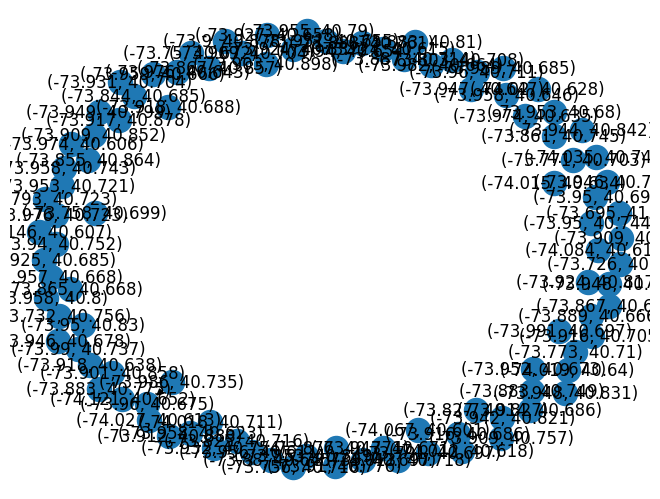

In [ ]:
# Print the graph
print(G2)
print(selfloops)
subgraph = G2.subgraph(random.sample(G2.nodes(), 100))

# Plot the subgraph
nx.draw(subgraph, with_labels=True)
plt.show()

In [ ]:
# prompt: show min and max values of the weights in the new graph

min_weight = min(nx.get_edge_attributes(G2, 'weight').values())
max_weight = max(nx.get_edge_attributes(G2, 'weight').values())

print(f"Minimum weight: {min_weight}")
print(f"Maximum weight: {max_weight}")


Minimum weight: 1.0
Maximum weight: 1.0


In [ ]:
# prompt: show max and min values of time_diff

print(data2['time_diff'].max())
print(data2['time_diff'].min())

print(data2['pickup_datetime'].max())
print(data2['pickup_datetime'].min())

print(data2['dropoff_datetime'].max())
print(data2['dropoff_datetime'].min())



3526282.0
1.0
2016-06-30 23:59:39
2016-01-01 00:00:17
2016-07-01 23:02:03
2016-01-01 00:03:31


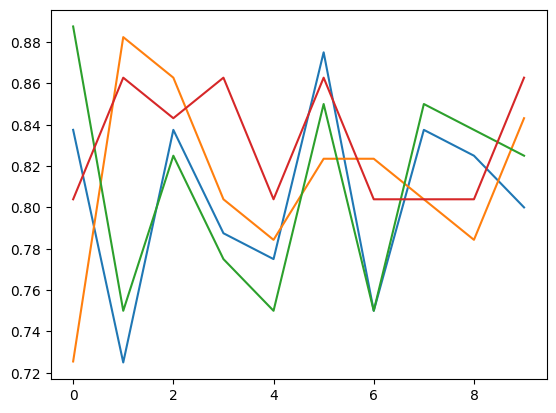

In [ ]:
# prompt: load the Magnetlr1num_filters32q20layer2.npy data, and plot it

import numpy as np
import matplotlib.pyplot as plt

# Load the data from the specified file
data = np.load("Magnetlr1num_filters32q20layer2.npy")

# Plot the data
plt.plot(data)

# Show the plot
plt.show()


In [ ]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.6 MB/s eta 0:00:00


In [ ]:
import torch
dataW = torch.load("data.pt")
import torch_geometric.data as tg_data
print(dataW[0].x.shape)

torch.Size([251, 1703])


In [ ]:
print(dataW[0].x[:,1702])

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 

In [ ]:
dataW = [1  ,
2  ,
2  ,
2  ,
1  ,
1  ,
1  ,
1  ,
2  ,
0  ,
2  ,
2  ,
2  ,
2  ,
2  ,
2  ,
2  ,
2  ,
3  ,
2  ,
1  ,
1  ,
2  ,
2  ,
1  ,
3  ,
1  ,
3  ,
1  ,
2  ,
2  ,
2  ,
2  ,
2  ,
1  ,
1  ,
1  ,
3  ,
1  ,
3  ,
2  ,
2  ,
1  ,
2  ,
4  ,
2  ,
4  ,
3  ,
1  ,
2  ,
4  ,
4  ,
1  ,
1  ,
3  ,
2  ,
2  ,
2  ,
3  ,
1  ,
1  ,
2  ,
2  ,
4  ,
4  ,
2  ,
1  ,
0  ,
2  ,
2  ,
2  ,
2  ,
2  ,
2  ,
1  ,
3  ,
2  ,
2  ,
1  ,
4  ,
2  ,
2  ,
1  ,
1  ,
1  ,
2  ,
2  ,
1  ,
2  ,
1  ,
2  ,
1  ,
4  ,
3  ,
2  ,
2  ,
2  ,
1  ,
1  ,
2  ,
0  ,
3  ,
3  ,
2  ,
2  ,
2  ,
2  ,
3  ,
1  ,
2  ,
1  ,
2  ,
1  ,
1  ,
2  ,
1  ,
1  ,
2  ,
3  ,
4  ,
2  ,
3  ,
2  ,
2  ,
2  ,
2  ,
3  ,
1  ,
1  ,
2  ,
1  ,
0  ,
2  ,
2  ,
2  ,
0  ,
2  ,
3  ,
0  ,
2  ,
2  ,
2  ,
2  ,
0  ,
3  ,
2  ,
3  ,
4  ,
1  ,
1  ,
1  ,
0  ,
1  ,
2  ,
2  ,
2  ,
4  ,
4  ,
1  ,
4  ,
3  ,
4  ,
2  ,
2  ,
2  ,
4  ,
2  ,
1  ,
2  ,
2  ,
2  ,
2  ,
2  ,
3  ,
2  ,
3  ,
3  ,
2  ,
3  ,
3  ,
2  ,
1  ,
2  ,
0  ,
4  ,
2  ,
4  ,
0  ,
1  ,
1  ,
2  ,
1  ,
3  ,
2  ,
2  ,
2  ,
1  ,
3  ,
4  ,
1  ,
1  ,
1  ,
2  ,
2  ,
1  ,
1  ,
1  ,
1  ,
1  ,
2  ,
3  ,
2  ,
4  ,
2  ,
1  ,
1  ,
2  ,
1  ,
3  ,
3  ,
2  ,
2  ,
1  ,
3  ,
1  ,
2  ,
2  ,
2  ,
1  ,
2  ,
2  ,
4  ,
2  ,
1  ,
2  ,
2  ,
2  ,
2  ,
2  ,
2  ,
3  ,
2  ,
1  ,
1  ,
4  ,
1  ,
2  ,
2  ,
2  ,
1  ,
2  ]


In [ ]:
import numpy as np

import matplotlib.pyplot as plt
# Load the data from the file
data = np.loadtxt('out1_node_feature_label.txt', delimiter=',', dtype=str)

# Convert the first column to strings
data[:, 0] = data[:, 0].astype(str)

# Extract the last digit from each row
data[:, 0] = data[:, 0].str[-1]

# Print the modified data
print(data)

AttributeError: 'numpy.ndarray' object has no attribute 'str'

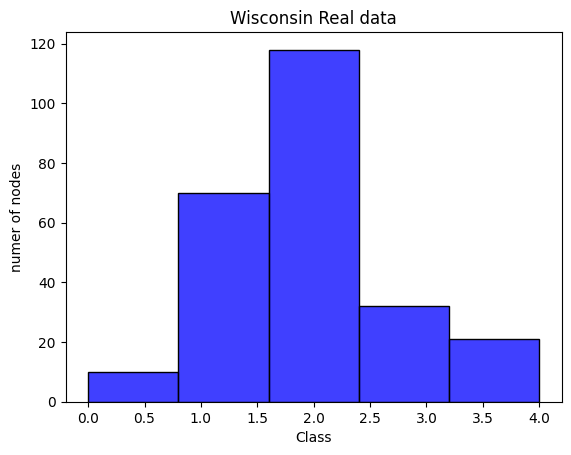

In [ ]:
# prompt: load pred_latest2.npy, and use seaborn to show colored histogram

import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
# Load the data from the specified file
# data = np.load("pred_latest2.npy")
# dataW = torch.load("data.pt")

# Plot the data using a colored histogram
sns.histplot(dataW, bins=5, color='blue')
plt.xlabel('Class')
# plt.xticks([0, 1, 2, 3, 4])
plt.ylabel('numer of nodes')
plt.title('Wisconsin Real data')
# Show the plot
plt.show()


In [ ]:
# prompt: print the number of each digit in the data

import numpy as np

# Load the data from the specified file
data = dataW

# Initialize a dictionary to store the count of each digit
digit_counts = {}

# Loop through each element in the data
for element in data:
    # Convert the element to a string
    element_str = str(element)

    # Get the last digit of the element
    last_digit = element_str[-1]

    # If the digit is not already in the dictionary, add it with a count of 0
    if last_digit not in digit_counts:
        digit_counts[last_digit] = 0

    # Increment the count of the digit
    digit_counts[last_digit] += 1

# Print the count of each digit
for digit, count in digit_counts.items():
    print(f"Digit {digit}: {count}")


Digit 1: 70
Digit 2: 118
Digit 0: 10
Digit 3: 32
Digit 4: 21


In [ ]:
clases = [9,74,117,31,20]
classes_real = [10,70,118,32,21]

In [ ]:
# prompt: load data from data.pt

dataW = torch.load("data.pt")


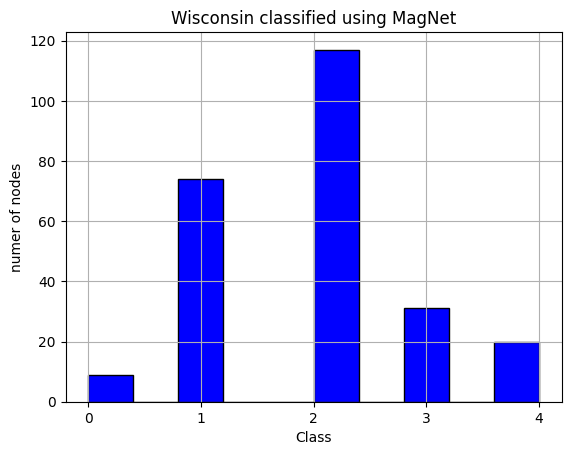

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create the histogram
plt.hist(data[0], color='blue', edgecolor='black')

# Customize the plot (optional)
plt.xlabel('Class')
plt.xticks([0, 1, 2, 3, 4])
plt.ylabel('numer of nodes')
plt.title('Wisconsin classified using MagNet')
plt.grid(True)

# Show the plot
plt.show()


ValueError: The 'color' keyword argument must have one color per dataset, but 1 datasets and 5 colors were provided

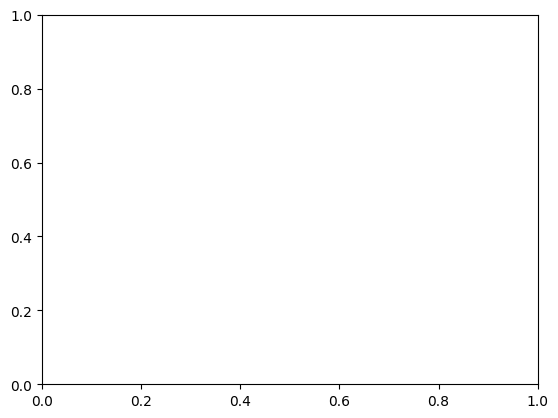

In [ ]:
# prompt: create histogram out of data from pred_latest2.npy, each bar in different colour, and the X values are 0, 1, 2, 3, 4

import numpy as np
import matplotlib.pyplot as plt

# Load the data from the specified file
data = np.load("pred_latest2.npy")

# Create a histogram with 5 bins and different colors for each bar
plt.hist(data[0], bins=5, color=['red', 'green', 'blue', 'yellow', 'orange'])

# Set the X values for the bars
plt.xticks([0, 1, 2, 3, 4])

# Show the plot
plt.show()


ValueError: The number of FixedLocator locations (251), usually from a call to set_ticks, does not match the number of labels (5).

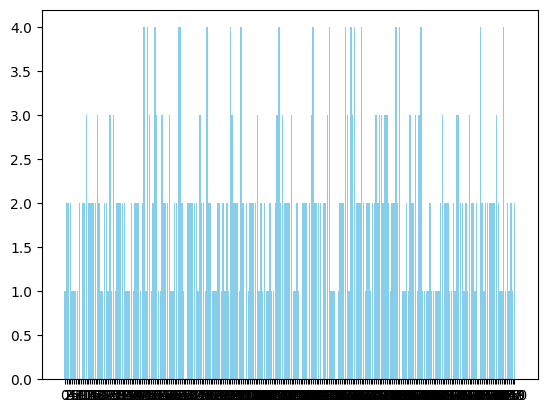

In [ ]:
import matplotlib.pyplot as plt

data =data[0]
# Bar labels (optional)
bar_labels = ["0","1",  "2", "3", "4"]

# Create the bar plot
plt.bar(range(len(data)), data, color='skyblue')  # Adjust color as desired

# Add bar labels (optional)
if bar_labels:
  plt.xticks(range(len(data)), bar_labels)  # Set x-axis tick positions and labels

# Customize the plot (optional)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Diagram')
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
print (data.shape)
print (data[0])

(1, 251)
[1 2 2 2 1 1 1 1 2 0 2 3 3 2 2 2 2 2 3 2 1 1 2 2 1 3 1 3 1 2 2 2 2 2 1 1 1
 3 1 2 2 2 1 2 3 2 4 3 1 2 3 4 1 1 3 2 2 2 3 1 1 2 2 3 4 2 1 0 2 2 2 2 2 2
 1 3 2 2 3 2 2 2 1 1 1 2 2 1 2 1 2 1 4 3 2 2 2 1 1 2 0 2 3 2 3 2 2 3 1 2 1
 2 1 1 2 1 1 2 3 3 2 3 2 2 2 2 3 1 1 2 1 0 3 2 2 2 0 3 3 2 2 2 2 0 3 2 3 3
 1 1 1 3 1 2 2 2 4 4 1 4 3 3 2 2 2 3 2 1 2 2 2 2 2 3 2 3 3 2 3 3 2 1 2 0 3
 2 3 0 1 1 2 1 3 2 2 3 1 3 0 1 1 1 2 2 1 1 1 1 1 2 3 2 2 2 1 1 2 1 3 3 2 2
 1 3 1 2 2 2 1 2 2 3 2 1 2 2 2 2 2 2 3 2 3 1 0 1 2 2 2 1 2]


In [3]:
!pip install seaborn 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 45.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.6.2 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.3.0 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.3.0 requires scipy==1.4.1, but you have scipy 1.6.2 which is incompatible.
tensorflow 2.3.0 requires tensorflow-estimator<2.4.0,>=2.3.0, but you have tensorflow-estimator 2.6.0 which is incompatible.


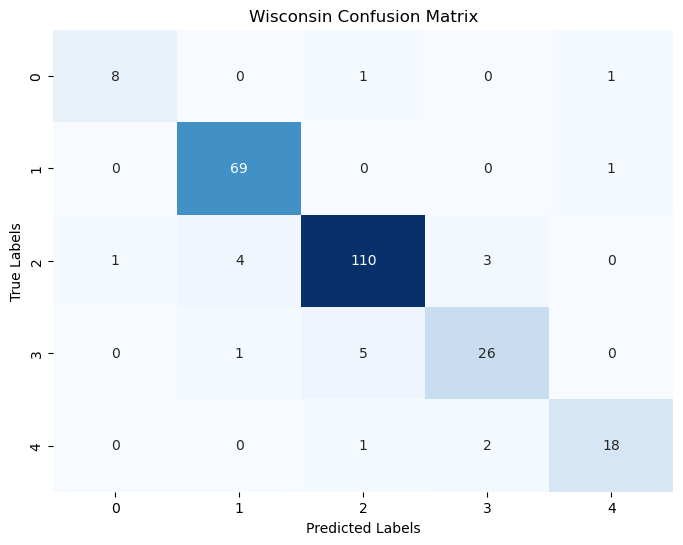

In [5]:
import torch
import csv
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data = torch.load("data.pt")
datapred = np.load("pred_latest2.npy")
data = np.array(data[0]['y'])
datapred = np.array(datapred[0])
cm = confusion_matrix(data, datapred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Wisconsin Confusion Matrix')
plt.show()

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

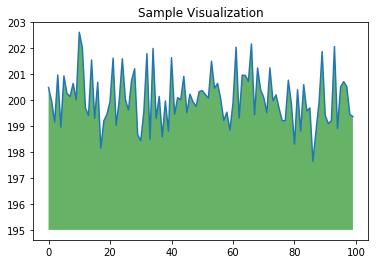

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

In [ ]:
# prompt: i want to read the file "data.pt" and represent it as a data table

import torch
import pandas as pd
!pip install torch_geometric
import torch_geometric

# Load the data from the file
data = torch.load("data.pt")

# Convert the data to a Pandas DataFrame
data_table = pd.DataFrame(data)

# Print the data table
print(data_table)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.2 MB/s eta 0:00:00


RuntimeError: The 'data' object was created by an older version of PyG. If this error occurred while loading an already existing dataset, remove the 'processed/' directory in the dataset's root folder and try again.

In [59]:
data = pd.read_csv("train.csv")


In [61]:
print(data.head())

          id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV file into a DataFrame
data_no_time = pd.read_csv("train.csv")

# Round the coordinates to two decimal places
data_no_time['pickup_longitude'] = data_no_time['pickup_longitude'].round(3)
data_no_time['pickup_latitude'] = data_no_time['pickup_latitude'].round(3)
data_no_time['dropoff_longitude'] = data_no_time['dropoff_longitude'].round(3)
data_no_time['dropoff_latitude'] = data_no_time['dropoff_latitude'].round(3)

# Convert the pickup and dropoff timestamps to datetime objects
data_no_time['pickup_datetime'] = pd.to_datetime(data_no_time['pickup_datetime'])
data_no_time['dropoff_datetime'] = pd.to_datetime(data_no_time['dropoff_datetime'])

data_no_time = data_no_time[(data_no_time['pickup_datetime'] >= '2016-01-04 08:00:00') & (data_no_time['pickup_datetime'] <= '2016-01-04 09:00:00')]


In [25]:
print(data_no_time.head())

              id  vendor_id     pickup_datetime    dropoff_datetime  \
1695   id1261506          2 2016-01-04 08:45:43 2016-01-04 08:57:27   
3560   id3277602          1 2016-01-04 08:02:30 2016-01-04 08:11:54   
14435  id2988116          2 2016-01-04 08:44:18 2016-01-04 09:02:44   
14852  id3771820          2 2016-01-04 08:46:00 2016-01-04 08:55:04   
20689  id0344937          2 2016-01-04 08:44:24 2016-01-04 09:06:09   

       passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
1695                 2           -73.987           40.737            -73.972   
3560                 2           -73.971           40.762            -73.996   
14435                4           -73.952           40.778            -73.981   
14852                1           -73.938           40.750            -73.954   
20689                5           -74.000           40.684            -73.989   

       dropoff_latitude store_and_fwd_flag  trip_duration  
1695             40.760         

In [44]:
import networkx as nx
G = nx.DiGraph()

selfloops = 0
# Add edges to the graph
for row in data_no_time.itertuples():
    source = (row.id, row.pickup_longitude, row.pickup_latitude)
    destination = (row.id, row.dropoff_longitude, row.dropoff_latitude)
    weight = row.trip_duration #FIXME change to speed   
    # if (source != destination):
    G.add_edge(source, destination, weight=weight)
    G.add_node
    # else :
    #   selfloops+=1

In [27]:
print(data_no_time['pickup_longitude'][1695])

-73.987


In [57]:

# Initialize empty lists for the new features
traffic_from = []
traffic_into = []
traffic_from_avg = []
traffic_into_avg = []

indexes = data_no_time.index

# Loop through each data point
for i in indexes:
    # pickup_node = (data_no_time['pickup_longitude'][i], data_no_time['pickup_latitude'][i])
    # dropoff_node = (data_no_time['dropoff_longitude'][i], data_no_time['dropoff_latitude'][i])
    node = (data_no_time['id'][i], data_no_time['pickup_longitude'][i], data_no_time['pickup_latitude'][i])

    incoming_edges = list(G.in_edges("B"))

    # Calculate the average weight of edges leaving the pickup node
    out_weights = [G.get_edge_data(node, neighbor)['weight'] for neighbor in G.neighbors(node)]
    # print(out_avg_weight)
    out_avg_weight = sum(out_weights) / len(out_weights) if len(out_weights) > 0 else 0

    incoming_edges = list(G.in_edges(node))
    # Calculate the average weight of edges entering the dropoff node
    in_weights =[]
    for edge in incoming_edges:
        w = int(G.get_edge_data(edge[0], edge[1])['weight'])
        if w :
            in_weights.append(w)

    # in_weights = [G.get_edge_data(edge[0], edge[1])['weight'] for edge in incoming_edges]
    # print(f'in_w = {in_weights}')
    in_avg_weight = sum(in_weights) / len(in_weights) if len(in_weights) > 0 else 0

    # Append the calculated values to the lists
    traffic_from.append(out_degree)
    traffic_into.append(in_degree)
    traffic_from_avg.append(out_avg_weight)
    traffic_into_avg.append(in_avg_weight)

# Add the new features to the DataFrame
# data_no_time['traffic_from'] = traffic_from
# data_no_time['traffic_into'] = traffic_into
data_no_time['traffic_from_avg'] = traffic_from_avg
data_no_time['traffic_into_avg'] = traffic_into_avg

# Print the DataFrame with the new features
print(data_no_time.head())


in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
w = 11
in_w = [11]
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
in_w = []
i

In [58]:
print(sum(data_no_time['traffic_into_avg']))

1010.0
